# Health-Related 911 Calls in Portland: A Spatial and Temporal Analysis
##### Data Project 01/15

This project examines spatial and temporal patterns of health-related 911 calls in Portland using public emergency dispatch data from the Portland Bureau of Emergency Communications (BOEC). The dataset was chosen because health-related 911 calls provide a useful proxy for acute healthcare demand at the community level and offer detailed location and time information.

The goal of this project is to identify where and when health-related emergency events are most concentrated in 2025, with a focus on visual exploration and heat map analysis rather than predictive modeling.

By focusing on health-related 911 calls and analyzing their patterns by neighborhood, time of day, day of week, call type, and priority, we aim to:

- Identify where health-related emergencies are most concentrated;
- Highlight peak periods of demand over the course of the day and week;
- Compare call response times across different types of health-related emergencies
- Explore how response performance varies by priority level

These insights are to support public health monitoring and resource planning by offering an intuitive view of when and where emergency healthcare demand is most likely to occur.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('DispatchedCalls_OpenData_2025.csv')
df.head(5)

,CallNumber,ReportMonthYear,ReportDateTime,TimeInQueue_sec,TravelTime_sec,ResponseTime_sec,Priority,PriorityNumber,FinalCallGroup,FinalCallCategory,Neighborhood,Address,OpenDataX,OpenDataY,OpenDataLon,OpenDataLat
0,3646283033,Sep-25,9/27/25 11:10,16.0,1167.0,1183.0,High,3,Crime,Burglary,Linnton,9600 BLOCK OF NW SKYLINE BLVD ...,7609362.0,710790.0,-122.815865,45.592996
1,3561904516,Jan-25,1/20/25 5:32,60.0,520.0,580.0,Low,6,Alarm,Alarm,Linnton,8600 BLOCK OF NW SKYLINE BLVD ...,7612735.0,707608.0,-122.802339,45.584537
2,3669430152,Dec-25,12/4/25 16:01,51.0,340.0,391.0,High,2,Traffic,Collision,Forest Park,NW SKYLINE BLVD / NW GERMANTOWN RD,7613454.0,707016.0,-122.799466,45.582970
3,3575115214,Mar-25,3/2/25 9:44,489.0,1123.0,1612.0,Medium,4,Disorder,Welfare Check,Forest Park,NW SKYLINE BLVD / NW GERMANTOWN RD,7613454.0,707016.0,-122.799466,45.582970
4,3589177914,Apr-25,4/14/25 18:53,530.0,622.0,1152.0,Medium,4,Disorder,Animal Problem,Forest Park,NW SKYLINE BLVD / NW GERMANTOWN RD,7613454.0,707016.0,-122.799466,45.582970


In [23]:
df["ReportDateTime"] = pd.to_datetime(df["ReportDateTime"], format="%m/%d/%y %H:%M")

In [24]:
df

,CallNumber,ReportMonthYear,ReportDateTime,TimeInQueue_sec,TravelTime_sec,ResponseTime_sec,Priority,PriorityNumber,FinalCallGroup,FinalCallCategory,Neighborhood,Address,OpenDataX,OpenDataY,OpenDataLon,OpenDataLat
0,3646283033,Sep-25,2025-09-27 11:10:00,16.0,1167.0,1183.0,High,3,Crime,Burglary,Linnton,9600 BLOCK OF NW SKYLINE BLVD ...,7609362.0,710790.0,-122.815865,45.592996
1,3561904516,Jan-25,2025-01-20 05:32:00,60.0,520.0,580.0,Low,6,Alarm,Alarm,Linnton,8600 BLOCK OF NW SKYLINE BLVD ...,7612735.0,707608.0,-122.802339,45.584537
2,3669430152,Dec-25,2025-12-04 16:01:00,51.0,340.0,391.0,High,2,Traffic,Collision,Forest Park,NW SKYLINE BLVD / NW GERMANTOWN RD,7613454.0,707016.0,-122.799466,45.582970
3,3575115214,Mar-25,2025-03-02 09:44:00,489.0,1123.0,1612.0,Medium,4,Disorder,Welfare Check,Forest Park,NW SKYLINE BLVD / NW GERMANTOWN RD,7613454.0,707016.0,-122.799466,45.582970
4,3589177914,Apr-25,2025-04-14 18:53:00,530.0,622.0,1152.0,Medium,4,Disorder,Animal Problem,Forest Park,NW SKYLINE BLVD / NW GERMANTOWN RD,7613454.0,707016.0,-122.799466,45.582970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221384,3624374012,Jul-25,2025-07-27 22:06:00,760.0,509.0,1269.0,High,2,Disorder,Welfare Check,NaN,UNKNOWN ADDRESS,NaN,NaN,NaN,NaN
221385,3585262027,Apr-25,NaT,1048.0,NaN,NaN,Low,7,Crime,Sex Offense,NaN,NaN,NaN,NaN,NaN,NaN
221386,3605368224,Jun-25,2025-06-01 23:14:00,351.0,405.0,756.0,Medium,4,Disorder,Welfare Check,NaN,UNKNOWN ADDRESS,NaN,NaN,NaN,NaN
221387,3576762861,Mar-25,2025-03-07 13:25:00,19.0,400.0,419.0,High,1,Disorder,Disturbance,NaN,UNKNOWN ADDRESS,NaN,NaN,NaN,NaN


In [28]:
df.columns

Index(['CallNumber', 'ReportMonthYear', 'ReportDateTime', 'TimeInQueue_sec',
       'TravelTime_sec', 'ResponseTime_sec', 'Priority', 'PriorityNumber',
       'FinalCallGroup', 'FinalCallCategory', 'Neighborhood', 'Address',
       'OpenDataX', 'OpenDataY', 'OpenDataLon', 'OpenDataLat'],
      dtype='object')

In [33]:
df["Year"] = df["ReportDateTime"].dt.year
df["Month"] = df["ReportDateTime"].dt.month
df["Hour"] = df["ReportDateTime"].dt.hour

df["Weekday"] = df["ReportDateTime"].dt.day_name()
df["IsWeekend"] = df["Weekday"].isin(["Saturday", "Sunday"])

In [31]:
df["TimeInQueue_min"] = df["TimeInQueue_sec"] / 60
df["TravelTime_min"] = df["TravelTime_sec"] / 60
df["ResponseTime_min"] = df["ResponseTime_sec"] / 60

In [44]:
df["FinalCallCategory"].value_counts()

FinalCallCategory
Welfare Check                                         23555
Unwanted Person                                       21801
Disturbance                                           17381
Suspicious                                            17227
Theft                                                 15487
Collision                                             13265
Alarm                                                 12127
Follow Up                                              8685
Stolen Vehicle                                         7767
Assault                                                7254
Area/Premise Check                                     6769
Harassment                                             6726
Threat                                                 6399
Assist                                                 5950
Vice                                                   5055
Behavioral Health                                      5017
Vandalism             

##### Health-related 911 calls are identified using FinalCallCategory rather than high-level call groups. 
A conservative classification is applied, focusing on categories that most directly reflect acute health or mental health concerns, including Behavioral Health, Welfare Check, and Missing Person. 
This approach prioritizes interpretability and avoids conflating medical demand with general law enforcement or public disorder incidents.

- Behavioral Health calls involve mental or emotional health concerns that may require medical or mental health–focused response rather than routine law enforcement.

- Welfare Check calls typically reflect concern about a person’s physical or mental well-being when their safety or health status is uncertain.

- Missing Person calls are included because they may involve individuals with elevated health or safety risk, such as those experiencing cognitive difficulties, mental health challenges, or other conditions that limit their ability to care for themselves.


In [45]:
health_categories = ["Behavioral Health", "Welfare Check", "Missing Person"]

df["IsHealthRelated"] = df["FinalCallCategory"].isin(health_categories)

In [46]:
df

,CallNumber,ReportMonthYear,ReportDateTime,TimeInQueue_sec,TravelTime_sec,ResponseTime_sec,Priority,PriorityNumber,FinalCallGroup,FinalCallCategory,...,OpenDataLat,Year,Month,Hour,Weekday,IsWeekend,TimeInQueue_min,TravelTime_min,ResponseTime_min,IsHealthRelated
0,3646283033,Sep-25,2025-09-27 11:10:00,16.0,1167.0,1183.0,High,3,Crime,Burglary,...,45.592996,2025.0,9.0,11.0,Saturday,True,0.266667,19.450000,19.716667,False
1,3561904516,Jan-25,2025-01-20 05:32:00,60.0,520.0,580.0,Low,6,Alarm,Alarm,...,45.584537,2025.0,1.0,5.0,Monday,False,1.000000,8.666667,9.666667,False
2,3669430152,Dec-25,2025-12-04 16:01:00,51.0,340.0,391.0,High,2,Traffic,Collision,...,45.582970,2025.0,12.0,16.0,Thursday,False,0.850000,5.666667,6.516667,False
3,3575115214,Mar-25,2025-03-02 09:44:00,489.0,1123.0,1612.0,Medium,4,Disorder,Welfare Check,...,45.582970,2025.0,3.0,9.0,Sunday,True,8.150000,18.716667,26.866667,True
4,3589177914,Apr-25,2025-04-14 18:53:00,530.0,622.0,1152.0,Medium,4,Disorder,Animal Problem,...,45.582970,2025.0,4.0,18.0,Monday,False,8.833333,10.366667,19.200000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221384,3624374012,Jul-25,2025-07-27 22:06:00,760.0,509.0,1269.0,High,2,Disorder,Welfare Check,...,NaN,2025.0,7.0,22.0,Sunday,True,12.666667,8.483333,21.150000,True
221385,3585262027,Apr-25,NaT,1048.0,NaN,NaN,Low,7,Crime,Sex Offense,...,NaN,NaN,NaN,NaN,NaN,False,17.466667,NaN,NaN,False
221386,3605368224,Jun-25,2025-06-01 23:14:00,351.0,405.0,756.0,Medium,4,Disorder,Welfare Check,...,NaN,2025.0,6.0,23.0,Sunday,True,5.850000,6.750000,12.600000,True
221387,3576762861,Mar-25,2025-03-07 13:25:00,19.0,400.0,419.0,High,1,Disorder,Disturbance,...,NaN,2025.0,3.0,13.0,Friday,False,0.316667,6.666667,6.983333,False


### Spatial Distribution
##### Where are health-related 911 calls most concentrated across Portland neighborhoods?

In [47]:
# check for health-related 911 calss
df_hr = df[df["IsHealthRelated"] == True]

df_hr.shape

(32390, 25)

In [48]:
# check for location data
df_hr[["OpenDataLat", "OpenDataLon"]].describe()

,OpenDataLat,OpenDataLon
count,26898.000000,26898.000000
mean,45.525168,-122.630040
std,0.032359,0.066444
min,45.433366,-122.799466
25%,45.504826,-122.681017
50%,45.522871,-122.651499
75%,45.538606,-122.572941
max,45.640170,-122.413953


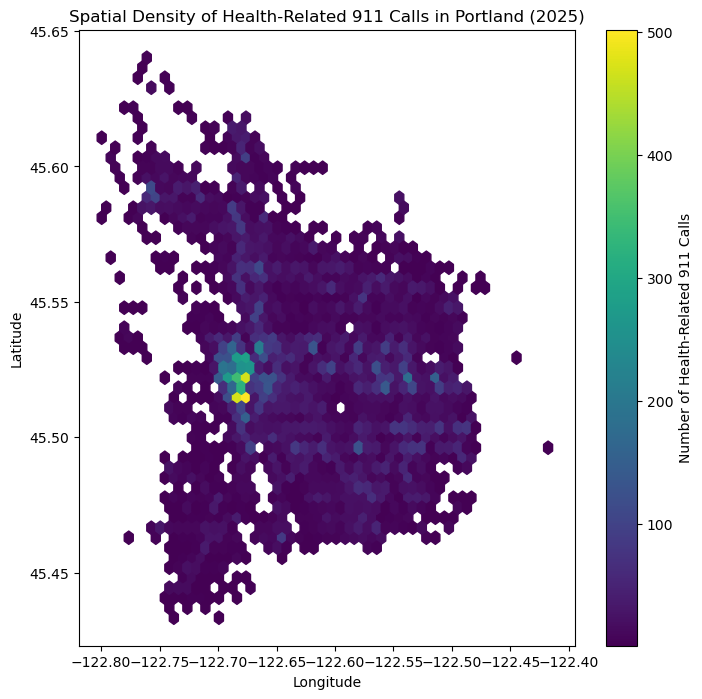

In [49]:
plt.figure(figsize=(8, 8))

plt.hexbin(
    df_hr["OpenDataLon"],
    df_hr["OpenDataLat"],
    gridsize=50,
    mincnt=1
)

plt.colorbar(label="Number of Health-Related 911 Calls")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Spatial Density of Health-Related 911 Calls in Portland (2025)")

plt.show()

#### Observation:

Most clusters are concentrated in central and western parts of the city, suggesting that healthcare demand varies by area.

### Temporal Patterns
##### At what times of day do health-related 911 calls most frequently occur? Do temporal patterns of health-related 911 calls differ between weekdays and weekends?

In [62]:
hour_counts = df_hr["Hour"].value_counts().sort_index()
avg_calls = hour_counts.mean()

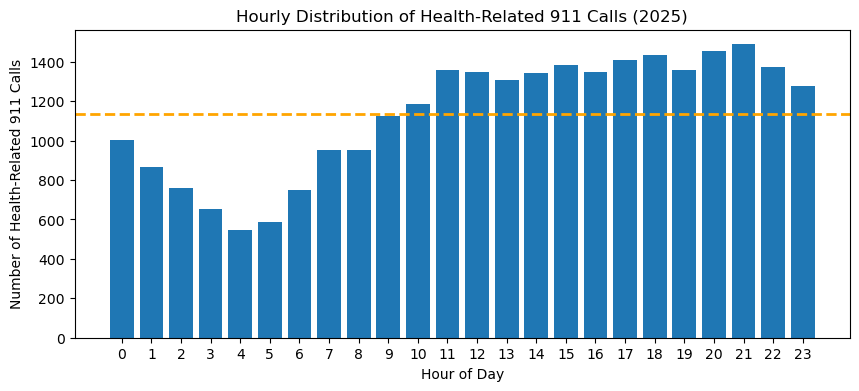

In [61]:
plt.figure(figsize=(10, 4))
plt.axhline(
    y=avg_calls,
    linestyle="--",
    linewidth=2,
    color = 'orange',
    label=f"Average ({avg_calls:.0f},)"
)

plt.bar(hour_counts.index, hour_counts.values)
plt.xlabel("Hour of Day")
plt.ylabel("Number of Health-Related 911 Calls")
plt.title("Hourly Distribution of Health-Related 911 Calls (2025)")
plt.xticks(range(0, 24))
plt.show()

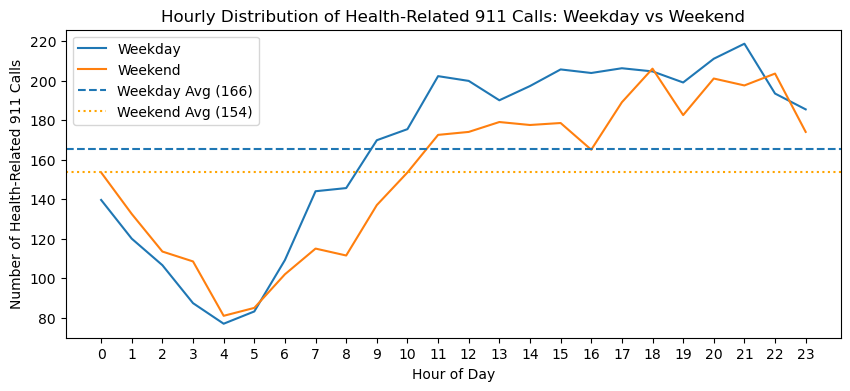

In [103]:
# Note that there are five days in weekday, and two days in weekend, so use average instead of total
weekday_counts = (df_hr[df_hr["IsWeekend"] == False]["Hour"].value_counts().sort_index()/5)

weekend_counts = (df_hr[df_hr["IsWeekend"] == True]["Hour"].value_counts().sort_index()/2)

weekday_avg = weekday_counts.mean()
weekend_avg = weekend_counts.mean()

plt.figure(figsize=(10, 4))

plt.plot(weekday_counts.index, weekday_counts.values, label="Weekday")
plt.plot(weekend_counts.index, weekend_counts.values, label="Weekend")

plt.axhline(weekday_avg, linestyle="--", label=f"Weekday Avg ({weekday_avg:.0f})")
plt.axhline(weekend_avg, linestyle=":", color = 'orange', label=f"Weekend Avg ({weekend_avg:.0f})")

plt.xlabel("Hour of Day")
plt.ylabel("Number of Health-Related 911 Calls")
plt.title("Hourly Distribution of Health-Related 911 Calls: Weekday vs Weekend")
plt.xticks(range(0, 24))
plt.legend()
plt.show()

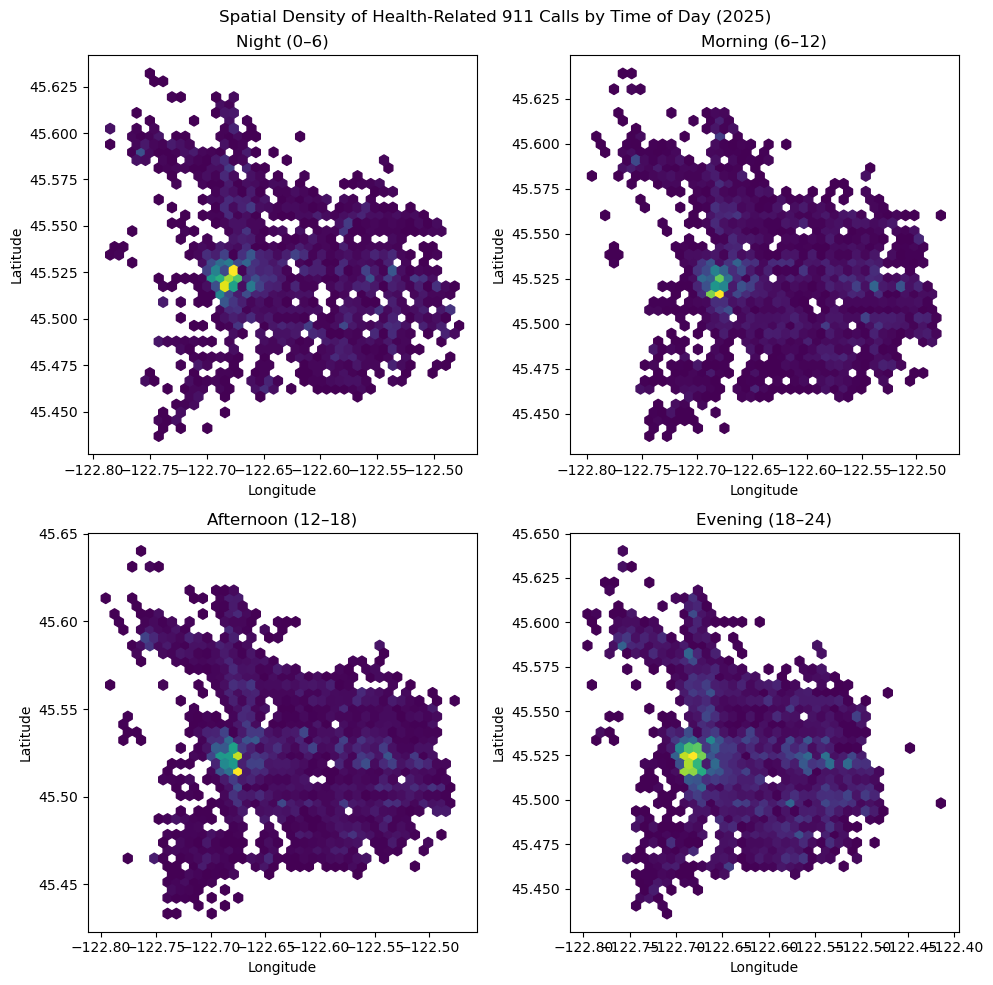

In [50]:
time_bins = {
    "Night (0–6)": (0, 6),
    "Morning (6–12)": (6, 12),
    "Afternoon (12–18)": (12, 18),
    "Evening (18–24)": (18, 24)
}

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()

for ax, (label, (start, end)) in zip(axes, time_bins.items()):
    subset = df_hr[(df_hr["Hour"] >= start) & (df_hr["Hour"] < end)]
    
    ax.hexbin(
        subset["OpenDataLon"],
        subset["OpenDataLat"],
        gridsize=40,
        mincnt=1
    )
    ax.set_title(label)
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

plt.suptitle("Spatial Density of Health-Related 911 Calls by Time of Day (2025)")
plt.tight_layout()
plt.show()

#### Observation:

Health-related 911 calls show a clear and consistent daily pattern, with the lowest volume occurring in the early morning hours (approximately 3–5 AM) and steadily increasing after 8 AM, reaching peak levels in the late afternoon and evening (around 6–9 PM).

The temporal distribution of calls is highly similar between weekdays and weekends. While total call volume is slightly lower on weekends, the overall hourly shape remains consistent, suggesting stable underlying demand rather than workday-specific effects.

Spatial analysis reveals strong geographic concentration of health-related 911 calls in central Portland and surrounding inner neighborhoods. These hotspots remain stable across different times of day, indicating persistent area-level demand rather than time-dependent shifts in location.

Evening hours exhibit the highest call density across most neighborhoods, suggesting increased acute healthcare needs during this period, which may have implications for EMS staffing and resource allocation.

### Response Time Differences by Call Type
##### Do different types of health-related calls experience different response times?

In [82]:
df_health = df[df["IsHealthRelated"] == True]
df_health["FinalCallCategory"].value_counts().head(10)

FinalCallCategory
Welfare Check        23555
Behavioral Health     5017
Missing Person        3818
Name: count, dtype: int64

In [89]:
selected_categories = ["Welfare Check", "Behavioral Health", "Missing Person"]
df_sub = df_health[df_health["FinalCallCategory"].isin(selected_categories)].copy()

In [93]:
summary = (df_sub.groupby("FinalCallCategory")["ResponseTime_min"].median().sort_values())

summary

FinalCallCategory
Behavioral Health    11.500000
Welfare Check        17.650000
Missing Person       41.966667
Name: ResponseTime_min, dtype: float64

<Figure size 800x400 with 0 Axes>

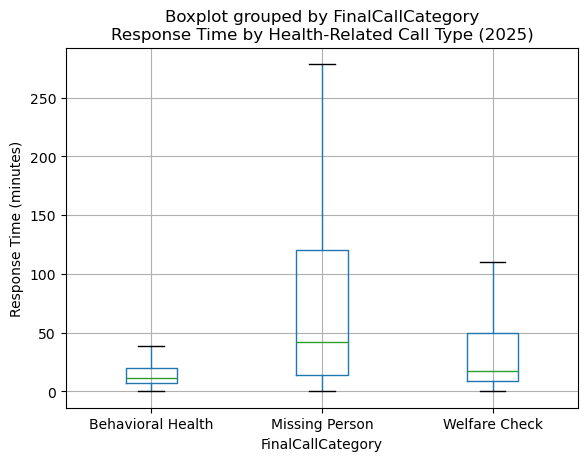

In [102]:
plt.figure(figsize=(8, 4))

df_sub.boxplot(column="ResponseTime_min", by="FinalCallCategory", showfliers=False)

plt.ylabel("Response Time (minutes)")
plt.title("Response Time by Health-Related Call Type (2025)")
plt.show()

#### Observation: Response Time Differences by Call Type

Response times vary across health-related call types.
- Behavioral health calls have the shortest and most consistent response times, suggesting more standardized or prioritized dispatch processes.
- Welfare check calls show moderate response times with wider variation, reflecting their uncertain but non-urgent nature.
- In contrast, missing person calls exhibit the longest and most variable response times, with a pronounced right tail, indicating that some cases require extended response and coordination rather than immediate on-scene intervention.

### Timeliness Analysis
##### How do queue, travel, and response times vary by priority level for health-related calls?

In [97]:
priority_summary = (df_health.groupby("PriorityNumber")[["TimeInQueue_min", "TravelTime_min", "ResponseTime_min"]]
    .median().sort_index())

priority_summary

,TimeInQueue_min,TravelTime_min,ResponseTime_min
PriorityNumber,,,
1,0.783333,7.183333,8.808333
2,1.516667,7.500000,10.983333
3,2.000000,5.783333,11.716667
4,15.266667,6.550000,25.866667
5,108.241667,0.400000,114.500000
6,28.216667,3.508333,35.966667
7,19.925000,0.666667,24.633333
8,7.000000,23.650000,30.650000
9,8.141667,0.041667,10.025000


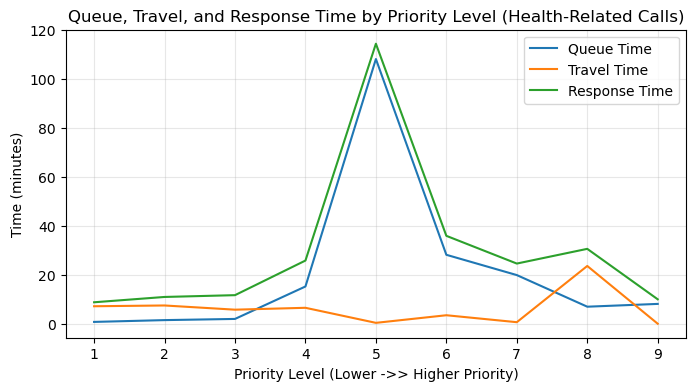

In [100]:
plt.figure(figsize=(8, 4))

plt.plot(priority_summary.index, priority_summary["TimeInQueue_min"], label="Queue Time")
plt.plot(priority_summary.index, priority_summary["TravelTime_min"], label="Travel Time")
plt.plot(priority_summary.index, priority_summary["ResponseTime_min"], label="Response Time")

plt.xlabel("Priority Level (Lower ->> Higher Priority)")
plt.ylabel("Time (minutes)")
plt.title("Queue, Travel, and Response Time by Priority Level (Health-Related Calls)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

##### Observation:

Queue, travel, and response times vary by priority level for health-related calls. Higher-priority calls (Priority 1–3) experience minimal queue times and consistently short response times. In contrast, Priority 5 calls show an extreme increase in response time, driven almost entirely by prolonged queue time rather than travel time. This suggests that lower-priority calls are intentionally delayed within the dispatch system, reflecting operational prioritization rather than geographic constraints.

#### Conclusion

This project explores health-related 911 calls in Portland using spatial, temporal, and operational perspectives. The analysis emphasizes descriptive patterns that reflect real-world emergency demand and system behavior.

First, health-related 911 calls show strong and consistent temporal patterns. Call volume is lowest during early morning hours and increases steadily throughout the day, peaking in the late afternoon and evening. Weekday and weekend patterns are highly similar, suggesting stable underlying demand drivers rather than day-specific effects.

Second, response times vary meaningfully by call type. Behavioral health calls tend to receive faster and more consistent responses, while welfare checks show moderate response times with greater variability. Missing person calls exhibit the longest and most variable response times, driven by a small number of complex cases that require extended coordination rather than immediate on-scene response.

Finally, analysis by priority level reveals that differences in total response time are largely driven by queue time rather than travel time. Higher-priority calls experience minimal waiting, while lower-priority calls—particularly Priority 5—are subject to substantial delays before dispatch. This pattern reflects intentional operational prioritization within the emergency response system rather than geographic constraints.